In [1]:
# objective: generate the particle size structure for the CMIP6 models
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob,os,subprocess
from glob import glob
import IPython.display as display
%matplotlib inline
from datetime import datetime as dt
import matplotlib.gridspec as gridspec
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import scipy.stats as st

In [2]:
#import data and create dictionary
# create a dictionary with the datasets
file_list = glob('/work/m1c/CMIP6_biome_PSS_data/*.nc')

file_list_biovol = glob('/work/m1c/CMIP6_biome_PSS_data/*biovolume.nc')
file_list_biovol_zoo_only = [x for x in file_list_biovol if 'zoo-only' in x]
file_list_biovol_phyto_only = [x for x in file_list_biovol if 'phyto-only' in x]
file_list_biovol = list(set(file_list_biovol).difference(file_list_biovol_zoo_only+file_list_biovol_phyto_only))

file_list_climatology = glob('/work/m1c/CMIP6_biome_PSS_data/*climatology_all*')

file_list_gCarbon = list(set(file_list).difference(file_list_biovol+file_list_climatology))

In [3]:
file_list_biovol

['/work/m1c/CMIP6_biome_PSS_data/biom_GISS_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CMCC_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CNRM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_IPSL_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CNRM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_IPSL_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GISS_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CESM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CMCC_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_UKESM_PSS_ssp5_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_CESM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_UKESM_PSS_hist_biovolume.nc',
 '/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_hist_biovolume.nc']

In [4]:


model_list = ['CESM','CMCC','CNRM','GFDL','GISS','IPSL','UKESM']#['CESM', 'CMCC','CNRM','GFDL', 'GISS','IPSL','UKESM']
ds_dict = {}
ds_dict['hist'] = {}
ds_dict['ssp5'] = {}
for e in ['hist', 'ssp5']:
    for m in model_list:
        model_path = [x for x in file_list_biovol if e in x and m in x]
        print(model_path)
        ds_dict[e][m]= xr.open_mfdataset(model_path).mean(dim=['time', 'biovol_um3'])
        #ds_dict[e][m]= ds_dict[e][m].assign_coords({'lon':(ds_CMCC.lon), 'lat':(ds_CMCC.lat)})
        #if m != 'GFDL':
        #ds_dict[m].reindex(lat=list(reversed(ds_dict[m].lat)))

['/work/m1c/CMIP6_biome_PSS_data/biom_CESM_PSS_hist_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_CMCC_PSS_hist_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_CNRM_PSS_hist_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_hist_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_GISS_PSS_hist_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_IPSL_PSS_hist_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_UKESM_PSS_hist_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_CESM_PSS_ssp5_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_CMCC_PSS_ssp5_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_CNRM_PSS_ssp5_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_GFDL_PSS_ssp5_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_GISS_PSS_ssp5_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_IPSL_PSS_ssp5_biovolume.nc']
['/work/m1c/CMIP6_biome_PSS_data/biom_UKESM_PSS_ssp5_biovolume.nc']


In [5]:
for r, m in enumerate(model_list):
    print(m)
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(betas_ssp5=ds_dict['ssp5'][m].betas_ssp5)
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(betas_diff=ds_dict['ssp5'][m].betas_ssp5-ds_dict['hist'][m].betas_hist)
     

    ds_dict['hist'][m]=ds_dict['hist'][m].assign(intercept_ssp5=ds_dict['ssp5'][m].intercept_ssp5)    
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(intercept_diff=ds_dict['ssp5'][m].intercept_ssp5-ds_dict['hist'][m].intercept_hist)
    
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(total_biovolume_ssp5=ds_dict['ssp5'][m].total_biovolume_ssp5)    
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(total_biovolume_diff=ds_dict['ssp5'][m].total_biovolume_ssp5-ds_dict['hist'][m].total_biovolume_hist)
    
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(R2_ssp5=ds_dict['ssp5'][m].R2_ssp5)                                             
    ds_dict['hist'][m]=ds_dict['hist'][m].assign(R2_diff=ds_dict['ssp5'][m].R2_ssp5-ds_dict['hist'][m].R2_hist)
    #print(ds_dict['hist'][m].lat)
    #print(ds_dict['ssp5'][m].lat)
    
    # this rounding ins crucial to ensure that the different xarray. datasets align https://stackoverflow.com/questions/69866469/subtract-two-xarrays-while-keeping-all-dimensions/69867005#69867005
    ds_dict['hist'][m]['lat'] = np.round(ds_dict['hist'][m]['lat'], 3)
    ds_dict['hist'][m]['lon'] = np.round(ds_dict['hist'][m]['lon'], 3)
    
    ds_dict['ssp5'][m]['lat'] = np.round(ds_dict['ssp5'][m]['lat'], 3)
    ds_dict['ssp5'][m]['lon'] = np.round(ds_dict['ssp5'][m]['lon'], 3)
    #print(ds_dict['hist'][m].lat.values)
    #if m != 'GFDL':
        #ds_dict['hist'][m] = ds_dict['hist'][m].assign_coords(lat=(ds_dict['hist'][m].lat * -1))
        #ds_dict['ssp5'][m] = ds_dict['ssp5'][m].assign_coords(lat=(ds_dict['ssp5'][m].lat * -1))




CESM
CMCC
CNRM
GFDL
GISS
IPSL
UKESM


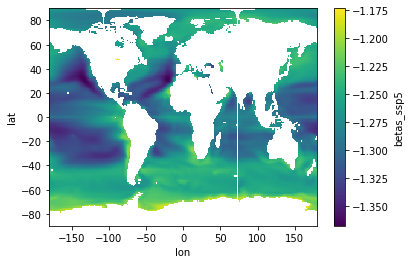

In [6]:
ds_dict['ssp5']['IPSL'].betas_ssp5.plot()

In [7]:
#ds_dict['hist']['CESM'],ds_dict['hist']['GFDL']=xr.align(ds_dict['hist']['GFDL'],ds_dict['hist']['CESM'],join='left')

In [8]:
#ds_dict['ssp5']['CESM'],ds_dict['ssp5']['GFDL']=xr.align(ds_dict['ssp5']['CESM'],ds_dict['ssp5']['GFDL'],join='exact')

In [9]:
#for e in ['hist', 'ssp5']:
    #print(e)
    #for m in model_list:
        #print(m)
        #ds_dict['hist']['CESM'],ds_dict[e][m]=xr.align(ds_dict['hist']['CESM'],ds_dict[e][m],join='exact')

In [10]:
#ds_dict['hist']['GFDL'] = ds_dict['hist']['GFDL'].assign_coords(lat=(ds_CESM.lat.values))
#ds_dict['hist']['GFDL'] = ds_dict['hist']['GFDL'].assign_coords(lat=(ds_dict['hist']['GFDL'].lat * -1))
#ds_dict['hist']['GFDL']=ds_dict['hist']['GFDL'].reindex(lat=ds_dict['hist']['GFDL'].lat[::-1])


#ds_dict['ssp5']['GFDL'] = ds_dict['ssp5']['GFDL'].assign_coords(lon=(ds_CESM.lon))
#ds_dict['ssp5']['GFDL'] = ds_dict['ssp5']['GFDL'].assign_coords(lat=(ds_dict['ssp5']['GFDL'].lat * -1))
#ds_dict['ssp5']['GFDL']=ds_dict['ssp5']['GFDL'].reindex(lat=ds_dict['hist']['GFDL'].lat[::-1])
#ds_dict['ssp5']['GFDL']['lat'] = np.round(ds_dict['ssp5']['GFDL']['lat'], 3)

In [11]:
ds_dict['hist']['CESM'], ds_dict['hist']['CMCC'], ds_dict['hist']['CNRM'], ds_dict['hist']['GFDL'], ds_dict['hist']['GISS'], ds_dict['hist']['IPSL'], ds_dict['hist']['UKESM'], ds_dict['ssp5']['CESM'], ds_dict['ssp5']['CMCC'], ds_dict['ssp5']['CNRM'], ds_dict['ssp5']['GFDL'], ds_dict['ssp5']['GISS'], ds_dict['ssp5']['IPSL'], ds_dict['ssp5']['UKESM']= xr.align(ds_dict['hist']['CESM'], ds_dict['hist']['CMCC'], ds_dict['hist']['CNRM'], ds_dict['hist']['GFDL'], ds_dict['hist']['GISS'], ds_dict['hist']['IPSL'], ds_dict['hist']['UKESM'], ds_dict['ssp5']['CESM'], ds_dict['ssp5']['CMCC'], ds_dict['ssp5']['CNRM'], ds_dict['ssp5']['GFDL'], ds_dict['ssp5']['GISS'], ds_dict['ssp5']['IPSL'], ds_dict['ssp5']['UKESM'], join='exact') 

<h1><center> model average of slope estimates </center></h1>

In [12]:
n=6

## slope

In [13]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(betas_hist_avg=(ds_dict['hist']['CESM'].betas_hist+
                                                                ds_dict['hist']['CMCC'].betas_hist+
                                                                ds_dict['hist']['CNRM'].betas_hist+
                                                                ds_dict['hist']['GFDL'].betas_hist+
                                                                #ds_dict['hist']['GISS'].betas_hist+
                                                                ds_dict['hist']['IPSL'].betas_hist+
                                                                ds_dict['hist']['UKESM'].betas_hist)/n)

In [14]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(betas_ssp5_avg=(ds_dict['hist']['CESM'].betas_ssp5+
                                                                ds_dict['hist']['CMCC'].betas_ssp5+
                                                                ds_dict['hist']['CNRM'].betas_ssp5+
                                                                ds_dict['hist']['GFDL'].betas_ssp5+
                                                                #ds_dict['hist']['GISS'].betas_ssp5+
                                                                ds_dict['hist']['IPSL'].betas_ssp5+
                                                                ds_dict['hist']['UKESM'].betas_ssp5)/n)

In [15]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(betas_diff_avg=(ds_dict['hist']['CESM'].betas_diff+
                                                                ds_dict['hist']['CMCC'].betas_diff+
                                                                ds_dict['hist']['CNRM'].betas_diff+
                                                                ds_dict['hist']['GFDL'].betas_diff+
                                                                ds_dict['hist']['GISS'].betas_diff+
                                                                ds_dict['hist']['IPSL'].betas_diff+
                                                                ds_dict['hist']['UKESM'].betas_diff)/n)

## Intercept

In [16]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(intercept_hist_avg=(ds_dict['hist']['CESM'].intercept_hist+
                                                                ds_dict['hist']['CMCC'].intercept_hist+
                                                                ds_dict['hist']['CNRM'].intercept_hist+
                                                                ds_dict['hist']['GFDL'].intercept_hist+
                                                                #ds_dict['hist']['GISS'].intercept_hist+
                                                                ds_dict['hist']['IPSL'].intercept_hist+
                                                                ds_dict['hist']['UKESM'].intercept_hist)/n)

In [17]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(intercept_ssp5_avg=(ds_dict['hist']['CESM'].intercept_ssp5+
                                                                ds_dict['hist']['CMCC'].intercept_ssp5+
                                                                ds_dict['hist']['CNRM'].intercept_ssp5+
                                                                ds_dict['hist']['GFDL'].intercept_ssp5+
                                                                #ds_dict['hist']['GISS'].intercept_ssp5+
                                                                ds_dict['hist']['IPSL'].intercept_ssp5+
                                                                ds_dict['hist']['UKESM'].intercept_ssp5)/n)

In [18]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(intercept_diff_avg=(ds_dict['hist']['CESM'].intercept_diff+
                                                                ds_dict['hist']['CMCC'].intercept_diff+
                                                                ds_dict['hist']['CNRM'].intercept_diff+
                                                                ds_dict['hist']['GFDL'].intercept_diff+
                                                                #ds_dict['hist']['GISS'].intercept_diff+
                                                                ds_dict['hist']['IPSL'].intercept_diff+
                                                                ds_dict['hist']['UKESM'].intercept_diff)/n)

## total biovolume

In [19]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(total_biovolume_hist_avg=(ds_dict['hist']['CESM'].intercept_hist+
                                                                ds_dict['hist']['CMCC'].total_biovolume_hist+
                                                                ds_dict['hist']['CNRM'].total_biovolume_hist+
                                                                ds_dict['hist']['GFDL'].total_biovolume_hist+
                                                                ds_dict['hist']['GISS'].total_biovolume_hist+
                                                                ds_dict['hist']['IPSL'].total_biovolume_hist+
                                                                ds_dict['hist']['UKESM'].total_biovolume_hist)/n)

In [20]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(total_biovolume_ssp5_avg=(ds_dict['hist']['CESM'].total_biovolume_ssp5+
                                                                ds_dict['hist']['CMCC'].total_biovolume_ssp5+
                                                                ds_dict['hist']['CNRM'].total_biovolume_ssp5+
                                                                ds_dict['hist']['GFDL'].total_biovolume_ssp5+
                                                                #ds_dict['ssp5']['GISS'].total_biovolume_ssp5+
                                                                ds_dict['hist']['IPSL'].total_biovolume_ssp5+
                                                                ds_dict['hist']['UKESM'].total_biovolume_ssp5)/n)

In [21]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(total_biovolume_diff_avg=(ds_dict['hist']['CESM'].total_biovolume_diff+
                                                                ds_dict['hist']['CMCC'].total_biovolume_diff+
                                                                ds_dict['hist']['CNRM'].total_biovolume_diff+
                                                                ds_dict['hist']['GFDL'].total_biovolume_diff+
                                                                #ds_dict['hist']['GISS'].total_biovolume_diff+
                                                                ds_dict['hist']['IPSL'].total_biovolume_diff+
                                                                ds_dict['hist']['UKESM'].total_biovolume_diff)/n)

<h1><center> model standard deviation of slope estimates </center></h1>

## slopes standard deviation

In [22]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(betas_hist_std=np.sqrt(( ((ds_dict['hist']['CESM'].betas_hist-ds_dict['hist']['CMCC'].betas_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['CMCC'].betas_hist-ds_dict['hist']['CMCC'].betas_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['CNRM'].betas_hist-ds_dict['hist']['CMCC'].betas_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['GFDL'].betas_hist-ds_dict['hist']['CMCC'].betas_hist_avg)**2)+
                                                                                 #((ds_dict['hist']['GISS'].betas_hist-ds_dict['hist']['CMCC'].betas_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['IPSL'].betas_hist-ds_dict['hist']['CMCC'].betas_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['UKESM'].betas_hist-ds_dict['hist']['CMCC'].betas_hist_avg)**2))/n))

In [23]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(betas_ssp5_std=np.sqrt(( ((ds_dict['hist']['CESM'].betas_ssp5-ds_dict['hist']['CMCC'].betas_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['CMCC'].betas_ssp5-ds_dict['hist']['CMCC'].betas_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['CNRM'].betas_ssp5-ds_dict['hist']['CMCC'].betas_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['GFDL'].betas_ssp5-ds_dict['hist']['CMCC'].betas_ssp5_avg)**2)+
                                                                                 #((ds_dict['hist']['GISS'].betas_ssp5-ds_dict['hist']['CMCC'].betas_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['IPSL'].betas_ssp5-ds_dict['hist']['CMCC'].betas_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['UKESM'].betas_ssp5-ds_dict['hist']['CMCC'].betas_ssp5_avg)**2)) /n))

## intercept standard deviation

In [24]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(intercept_hist_std=np.sqrt(( ((ds_dict['hist']['CESM'].intercept_hist-ds_dict['hist']['CMCC'].intercept_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['CMCC'].intercept_hist-ds_dict['hist']['CMCC'].intercept_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['CNRM'].intercept_hist-ds_dict['hist']['CMCC'].intercept_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['GFDL'].intercept_hist-ds_dict['hist']['CMCC'].intercept_hist_avg)**2)+
                                                                                 #((ds_dict['hist']['GISS'].intercept_hist-ds_dict['hist']['CMCC'].intercept_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['IPSL'].intercept_hist-ds_dict['hist']['CMCC'].intercept_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['UKESM'].intercept_hist-ds_dict['hist']['CMCC'].intercept_hist_avg)**2)) /n))

In [25]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(intercept_ssp5_std=np.sqrt(( ((ds_dict['hist']['CESM'].intercept_ssp5-ds_dict['hist']['CMCC'].intercept_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['CMCC'].intercept_ssp5-ds_dict['hist']['CMCC'].intercept_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['CNRM'].intercept_ssp5-ds_dict['hist']['CMCC'].intercept_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['GFDL'].intercept_ssp5-ds_dict['hist']['CMCC'].intercept_ssp5_avg)**2)+
                                                                                 #((ds_dict['hist']['GISS'].intercept_ssp5-ds_dict['hist']['CMCC'].intercept_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['IPSL'].intercept_ssp5-ds_dict['hist']['CMCC'].intercept_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['UKESM'].intercept_ssp5-ds_dict['hist']['CMCC'].intercept_ssp5_avg)**2)) /n))

## biovolume standard deviation

In [26]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(total_biovolume_hist_std=np.sqrt(( ((ds_dict['hist']['CESM'].total_biovolume_hist-ds_dict['hist']['CMCC'].total_biovolume_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['CMCC'].total_biovolume_hist-ds_dict['hist']['CMCC'].total_biovolume_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['CNRM'].total_biovolume_hist-ds_dict['hist']['CMCC'].total_biovolume_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['GFDL'].total_biovolume_hist-ds_dict['hist']['CMCC'].total_biovolume_hist_avg)**2)+
                                                                                 #((ds_dict['hist']['GISS'].total_biovolume_hist-ds_dict['hist']['CMCC'].total_biovolume_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['IPSL'].total_biovolume_hist-ds_dict['hist']['CMCC'].total_biovolume_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['UKESM'].total_biovolume_hist-ds_dict['hist']['CMCC'].total_biovolume_hist_avg)**2)) /n))

In [27]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(total_biovolume_ssp5_std=np.sqrt(( ((ds_dict['hist']['CESM'].total_biovolume_ssp5-ds_dict['hist']['CMCC'].total_biovolume_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['CMCC'].total_biovolume_ssp5-ds_dict['hist']['CMCC'].total_biovolume_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['CNRM'].total_biovolume_ssp5-ds_dict['hist']['CMCC'].intercept_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['GFDL'].total_biovolume_ssp5-ds_dict['hist']['CMCC'].intercept_ssp5_avg)**2)+
                                                                                 #((ds_dict['hist']['GISS'].total_biovolume_ssp5-ds_dict['hist']['CMCC'].total_biovolume_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['IPSL'].total_biovolume_ssp5-ds_dict['hist']['CMCC'].total_biovolume_ssp5_avg)**2)+
                                                                                 ((ds_dict['hist']['UKESM'].total_biovolume_ssp5-ds_dict['hist']['CMCC'].total_biovolume_ssp5_avg)**2)) /n))

## slopes std diff

In [28]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(betas_diff_std=np.sqrt(( ((ds_dict['hist']['CESM'].betas_diff-ds_dict['hist']['CMCC'].betas_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['CMCC'].betas_diff-ds_dict['hist']['CMCC'].betas_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['CNRM'].betas_diff-ds_dict['hist']['CMCC'].betas_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['GFDL'].betas_diff-ds_dict['hist']['CMCC'].betas_diff_avg)**2)+
                                                                                 #((ds_dict['hist']['GISS'].betas_diff-ds_dict['hist']['CMCC'].betas_hist_avg)**2)+
                                                                                 ((ds_dict['hist']['IPSL'].betas_diff-ds_dict['hist']['CMCC'].betas_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['UKESM'].betas_diff-ds_dict['hist']['CMCC'].betas_diff_avg)**2))/n))

## intercept std diff

In [29]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(intercept_diff_std=np.sqrt(( ((ds_dict['hist']['CESM'].intercept_diff-ds_dict['hist']['CMCC'].intercept_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['CMCC'].intercept_diff-ds_dict['hist']['CMCC'].intercept_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['CNRM'].intercept_diff-ds_dict['hist']['CMCC'].intercept_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['GFDL'].intercept_diff-ds_dict['hist']['CMCC'].intercept_diff_avg)**2)+
                                                                                 #((ds_dict['hist']['GISS'].intercept_diff-ds_dict['hist']['CMCC'].intercept_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['IPSL'].intercept_diff-ds_dict['hist']['CMCC'].intercept_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['UKESM'].intercept_diff-ds_dict['hist']['CMCC'].intercept_diff_avg)**2)) /n))

## total biovolume std diff

In [30]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(total_biovolume_diff_std=np.sqrt(( ((ds_dict['hist']['CESM'].total_biovolume_diff-ds_dict['hist']['CMCC'].total_biovolume_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['CMCC'].total_biovolume_diff-ds_dict['hist']['CMCC'].total_biovolume_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['CNRM'].total_biovolume_diff-ds_dict['hist']['CMCC'].total_biovolume_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['GFDL'].total_biovolume_diff-ds_dict['hist']['CMCC'].total_biovolume_diff_avg)**2)+
                                                                                 #((ds_dict['hist']['GISS'].total_biovolume_diff-ds_dict['hist']['CMCC'].total_biovolume_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['IPSL'].total_biovolume_diff-ds_dict['hist']['CMCC'].total_biovolume_diff_avg)**2)+
                                                                                 ((ds_dict['hist']['UKESM'].total_biovolume_diff-ds_dict['hist']['CMCC'].total_biovolume_diff_avg)**2)) /n))

In [31]:
ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(stipling_vals_betas=(np.fabs(ds_dict['hist']['CMCC'].betas_diff_avg)-ds_dict['hist']['CMCC'].betas_diff_std))
ds_dict['hist']['CMCC']['stipling_betas_plot'] = ds_dict['hist']['CMCC'].stipling_vals_betas.where(ds_dict['hist']['CMCC']['stipling_vals_betas'] > 0) 

ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(stipling_vals_intercept=(np.fabs(ds_dict['hist']['CMCC'].intercept_diff_avg)-ds_dict['hist']['CMCC'].intercept_diff_std))
ds_dict['hist']['CMCC']['stipling_intercept_plot'] = ds_dict['hist']['CMCC'].stipling_vals_intercept.where(ds_dict['hist']['CMCC']['stipling_vals_intercept'] > 0)


ds_dict['hist']['CMCC']=ds_dict['hist']['CMCC'].assign(stipling_vals_total_biovolume=(np.fabs(ds_dict['hist']['CMCC'].total_biovolume_diff_avg)-ds_dict['hist']['CMCC'].total_biovolume_diff_std))
ds_dict['hist']['CMCC']['stipling_total_biovolume_plot'] = ds_dict['hist']['CMCC'].stipling_vals_total_biovolume.where(ds_dict['hist']['CMCC']['stipling_vals_total_biovolume'] > 0)


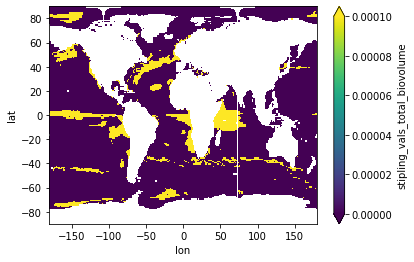

In [32]:
ds_dict['hist']['CMCC'].stipling_vals_total_biovolume.plot(vmin=0, vmax=0.0001)

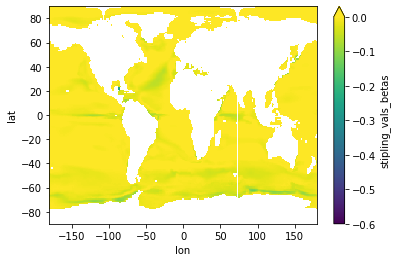

In [33]:
ds_dict['hist']['CMCC'].stipling_vals_betas.plot(vmin=-0.6, vmax=0)

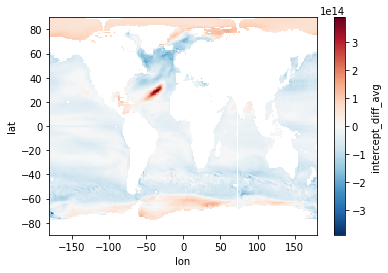

In [34]:
ds_dict['hist']['CMCC'].intercept_diff_avg.plot()

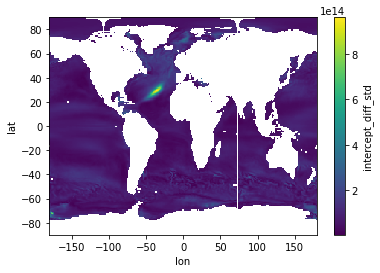

In [35]:
ds_dict['hist']['CMCC'].intercept_diff_std.plot()

In [36]:
test = ds_dict['hist']['CMCC'].stipling_vals_intercept.where(ds_dict['hist']['CMCC']['stipling_vals_intercept'] > 0) 

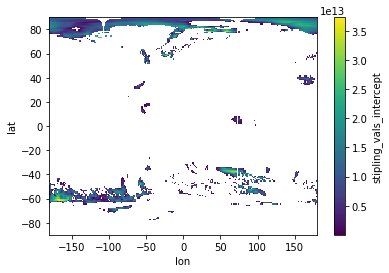

In [37]:
test.plot()

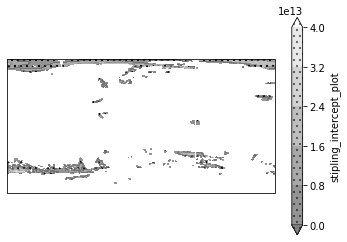

In [38]:

ax = plt.axes(projection=ccrs.PlateCarree())
ax=ds_dict['hist']['CMCC']['stipling_intercept_plot'].plot.contourf( hatches=['..'],cmap='gray', extend='both', alpha=0.5, transform=ccrs.PlateCarree())

In [39]:
ds_dict['hist']['CMCC']['stipling_intercept_plot']

<xarray.DataArray 'stipling_intercept_plot' (lat: 180, lon: 360)>
dask.array<where, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

In [40]:
ds_dict['hist']['CMCC']['stipling_total_biovolume_plot']

<xarray.DataArray 'stipling_total_biovolume_plot' (lat: 180, lon: 360)>
dask.array<where, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

In [41]:
ds_dict['hist']['CMCC']['stipling_betas_plot']

<xarray.DataArray 'stipling_betas_plot' (lat: 180, lon: 360)>
dask.array<where, shape=(180, 360), dtype=float64, chunksize=(180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5

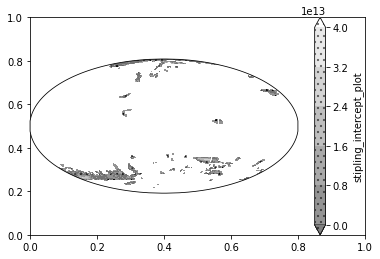

In [42]:
fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.Mollweide())
ax=ds_dict['hist']['CMCC']['stipling_intercept_plot'].plot.contourf( hatches=['..'],cmap='gray', extend='both', alpha=0.5,  transform=ccrs.PlateCarree())

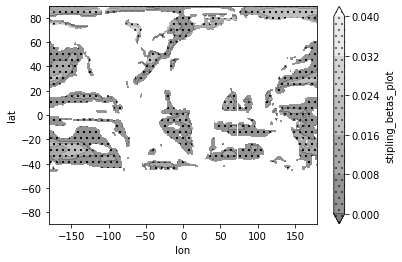

In [43]:
ds_dict['hist']['CMCC']['stipling_betas_plot'].plot.contourf( hatches=['..'],cmap='gray', extend='both', alpha=0.5)

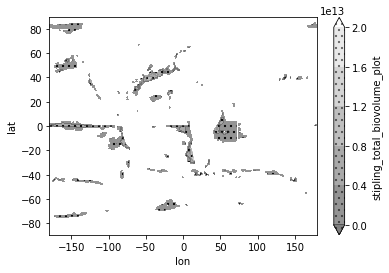

In [44]:
ds_dict['hist']['CMCC']['stipling_total_biovolume_plot'].plot.contourf( hatches=['..'],cmap='gray', extend='both', alpha=0.5)

In [45]:
ds_dict['hist']['CMCC']['betas_hist_avg'].values

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-1.12645053, -1.12659114, -1.12673229, ..., -1.12603705,
        -1.12617462, -1.12631117],
       [-1.1271705 , -1.12725204, -1.12733411, ..., -1.12693229,
        -1.12701066, -1.12709031],
       [-1.12818903, -1.1282147 , -1.12823987, ..., -1.12811065,
        -1.12813777, -1.12816338]])

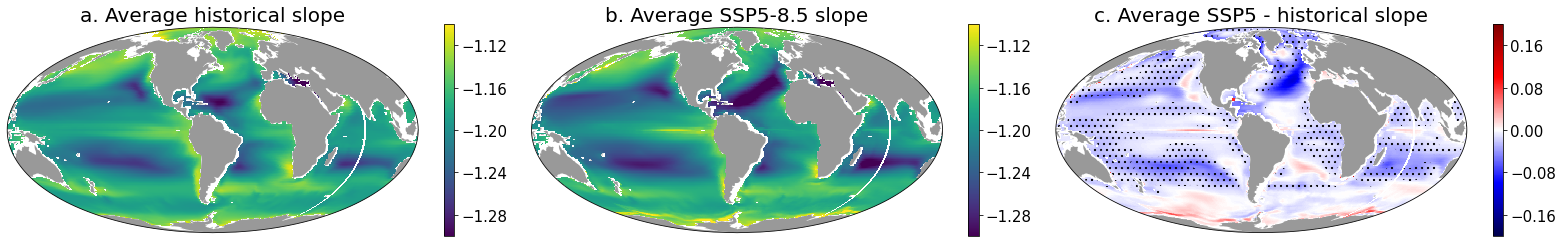

In [46]:
# create the 7x3 grid of subplots using gridspec
letters_maps = ['a.','b.','c.']
fig = plt.figure(figsize=(22,15))
gs = gridspec.GridSpec(nrows=1, ncols=3, figure=fig)
m=0
# plot the data on the subplots
axs = [None]*3
cs = [None]*3
st = [None]*3
for i in range(3):
    axs[i] = plt.subplot(gs[i],projection=ccrs.Mollweide(central_longitude=300))
    axs[i].add_feature(cfeature.LAND,  facecolor='#999999')
    #v_min=-1.3
    #v_max=-1.
    if i % 3 == 0:
        cs[i]=ds_dict['hist']['CMCC']['betas_hist_avg'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(),  cmap='viridis', vmin = -1.3, vmax=-1.1, add_colorbar=False) #, add_colorbar=False , cbar_kwargs={'shrink': 0.3,  "spacing": "proportional"}
        axs[i].set_title((letters_maps[i]+' '+'Average historical slope'), fontsize=20)

    elif i % 3 == 1:
        cs[i]=ds_dict['hist']['CMCC']['betas_ssp5_avg'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(),  cmap='viridis', vmin = -1.3, vmax=-1.1, add_colorbar=False)
        axs[i].set_title((letters_maps[i]+' '+'Average SSP5-8.5 slope'), fontsize=20)

    else:
        
        cs[i]=ds_dict['hist']['CMCC']['stipling_betas_plot'].plot.contourf( hatches=['..'],origin = 'lower', transform=ccrs.PlateCarree(), cmap=None, add_colorbar=False, alpha=0)
        cs[i]=ds_dict['hist']['CMCC']['betas_diff_avg'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(),  cmap='seismic', add_colorbar=False, vmin = -0.2, vmax=0.2)
        axs[i].set_title((letters_maps[i]+' '+'Average SSP5 - historical slope'), fontsize=20)

        m+=1

    #divider = make_axes_locatable(cs[i])
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    bar = plt.colorbar(cs[i], shrink = 0.2)
    tick_locator = ticker.MaxNLocator(nbins=5)
    bar.locator = tick_locator
    bar.update_ticks()
    for t in bar.ax.get_yticklabels():
        t.set_fontsize(15)
    #if i==2:
        #bar.set_label(r'Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize=15, rotation=-90, labelpad=15)
    
    
fig.subplots_adjust(wspace=0, hspace=-0.7)
plt.tight_layout()
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_slopes_average_map_biovolume_NO_GISS.pdf', dpi=300)

<h1><center> model average of intercept estimates </center></h1>

In [47]:
import matplotlib.ticker as ticker
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

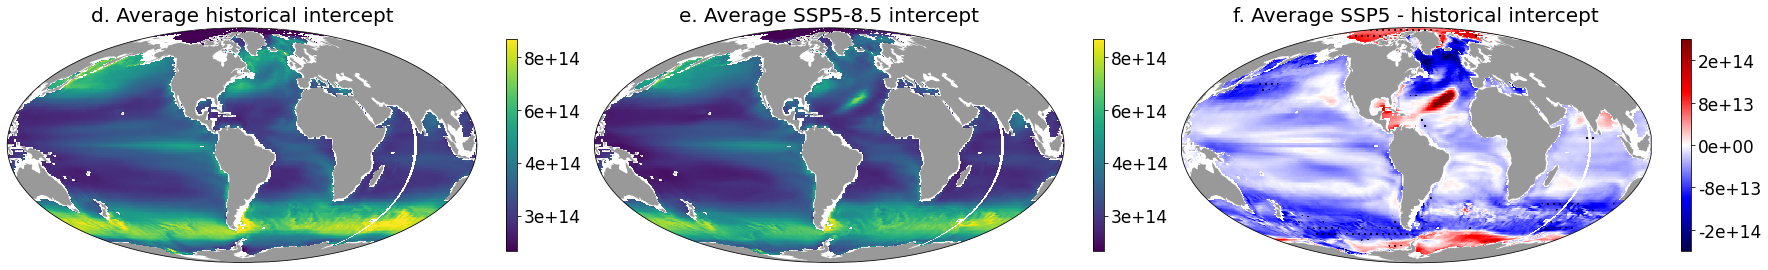

In [48]:
letters_maps_giss = ['d.','e.','f.']
# create the 7x3 grid of subplots using gridspec
fig = plt.figure(figsize=(25,15))
gs = gridspec.GridSpec(nrows=1, ncols=3, figure=fig)
m=0
# plot the data on the subplots
axs = [None]*3
cs = [None]*3
for i in range(3):
    axs[i] = plt.subplot(gs[i],projection=ccrs.Mollweide(central_longitude=300))
    axs[i].add_feature(cfeature.LAND,  facecolor='#999999')
    #v_min=-1.3
    #v_max=-1.
    if i % 3 == 0:
        cs[i]=ds_dict['hist']['CMCC']['intercept_hist_avg'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(), vmin=2e14, vmax=8e14,  cmap='viridis', add_colorbar=False) #, add_colorbar=False , cbar_kwargs={'shrink': 0.3,  "spacing": "proportional"}, vmin=2e14, vmax=8e14, without GISS
        axs[i].set_title((letters_maps_giss[i]+' '+'Average historical intercept'), fontsize=20)

    elif i % 3 == 1:
        cs[i]=ds_dict['hist']['CMCC']['intercept_ssp5_avg'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(),vmin=2e14, vmax=8e14,  cmap='viridis',  add_colorbar=False) #vmin=1e7, vmax=1e18, for GISS vmin=2e14, vmax=8e14, weithout giss
        axs[i].set_title((letters_maps_giss[i]+' '+'Average SSP5-8.5 intercept'), fontsize=20)

    else:
        #axs[i] = plt.axes(projection=ccrs.PlateCarree())
        #cs[i]=ds_dict['hist']['CMCC']['stipling_intercept_plot'].plot.contourf( hatches=['..'],origin = 'lower',  cmap=None, add_colorbar=False, alpha=0)
        cs[i]= ds_dict['hist']['CMCC']['stipling_intercept_plot'].plot.contourf( hatches=['..'],origin = 'upper',transform=ccrs.PlateCarree(),cmap=None, add_colorbar=False, alpha=0)
        cs[i]=ds_dict['hist']['CMCC']['intercept_diff_avg'].plot.imshow(ax=axs[i], origin = 'upper',  cmap='seismic', vmin=-2e14, vmax=2e14, transform=ccrs.PlateCarree(), add_colorbar=False) #vmin=-1e18, vmax=1e18, for GISSS, vmin=-2e14, vmax=2e14, weithout giss
        #axs[i].axes(projection=ccrs.Mollweide())
        
        axs[i].set_title((letters_maps_giss[i]+' '+'Average SSP5 - historical intercept'), fontsize=20)

        m+=1

    #divider = make_axes_locatable(cs[i])
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    bar = plt.colorbar(cs[i], shrink = 0.2, format='%.e')#format=ticker.FuncFormatter(fmt)
    tick_locator = ticker.MaxNLocator(nbins=5)
    bar.locator = tick_locator
    bar.update_ticks()
    #bar.ax.set_yticklabels(["$10^{{{:.0f}}}$".format(i) for i in bar.get_ticks()])
    for t in bar.ax.get_yticklabels():
        t.set_fontsize(17)
    #if i==2:
        #bar.set_label(r'Intercept ($\mu$m$^{3}$ m$^{-2}$ $\mu$m$^{-3}$)', fontsize=15, rotation=-90,  labelpad=15)
    
    
plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=-0.7)
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_intercept_map_average_biovolume_NO_GISS.pdf', dpi=300)

<h1><center> model average of total biovolume estimates </center></h1>

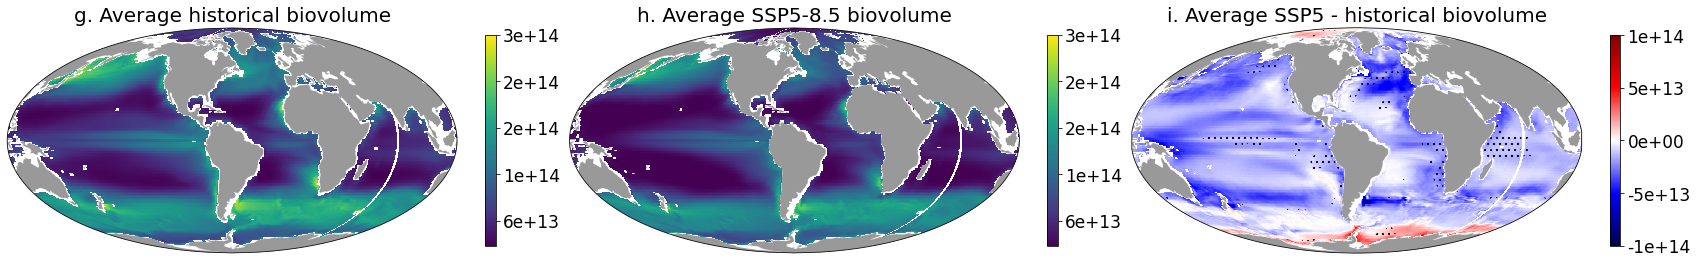

In [49]:
# create the 7x3 grid of subplots using gridspec
letters_maps_giss = ['g.','h.','i.']
fig = plt.figure(figsize=(24,15))
gs = gridspec.GridSpec(nrows=1, ncols=3, figure=fig)
m=0
# plot the data on the subplots
axs = [None]*3
cs = [None]*3
for i in range(3):
    axs[i] = plt.subplot(gs[i],projection=ccrs.Mollweide(central_longitude=300))
    axs[i].add_feature(cfeature.LAND,  facecolor='#999999')
    #v_min=-1.3
    #v_max=-1.
    if i % 3 == 0:
        cs[i]=ds_dict['hist']['CMCC']['total_biovolume_hist_avg'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(),  cmap='viridis', vmax=3e13, vmin=3e14, add_colorbar=False) #, add_colorbar=False , cbar_kwargs={'shrink': 0.3,  "spacing": "proportional"}
        axs[i].set_title((letters_maps_giss[i]+' '+'Average historical biovolume'), fontsize=20)

    elif i % 3 == 1:
        cs[i]=ds_dict['hist']['CMCC']['total_biovolume_ssp5_avg'].plot.imshow(ax=axs[i], origin = 'lower', transform=ccrs.PlateCarree(),  cmap='viridis', vmax=3e13, vmin=3e14,  add_colorbar=False)
        axs[i].set_title((letters_maps_giss[i]+' '+'Average SSP5-8.5 biovolume'), fontsize=20)

    else:
        
        #cs[i]=ds_dict['hist']['CMCC']['stipling_intercept_plot'].plot.contourf( hatches=['..'],origin = 'lower',  cmap=None, add_colorbar=False, alpha=0)
        cs[i]= ds_dict['hist']['CMCC']['stipling_total_biovolume_plot'].plot.contourf( hatches=['..'],origin = 'upper',transform=ccrs.PlateCarree(),cmap=None, add_colorbar=False, alpha=0, zorder=2)
        cs[i]=ds_dict['hist']['CMCC']['total_biovolume_diff_avg'].plot.imshow(ax=axs[i], origin = 'upper', transform=ccrs.PlateCarree(),  cmap='seismic', add_colorbar=False)
        #axs[i].axes(projection=ccrs.Mollweide())
        axs[i].set_title((letters_maps_giss[i]+' '+'Average SSP5 - historical biovolume'), fontsize=20)

        m+=1

    #divider = make_axes_locatable(cs[i])
    #cax = divider.append_axes("right", size="5%", pad=0.05)
    bar = plt.colorbar(cs[i], shrink = 0.2, format='%.e') #format=ticker.FuncFormatter(fmt)
    #cbar6 = ax.figure.colorbar(im6, ax=ax6, ticks=MaxNLocator(2), )
    tick_locator = ticker.MaxNLocator(nbins=5)
    bar.locator = tick_locator
    bar.update_ticks()
    for t in bar.ax.get_yticklabels():
        t.set_fontsize(17)
    #if i ==2:
        #bar.set_label(r'Biovolume ($\mu$m$^{3}$ m$^{-2}$)', fontsize=15, rotation=-90,  labelpad=15)
    
    
plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=-0.7)
plt.savefig('/work/m1c/CMIP6_size_spectra_scripts/plots/fig_total_biovolume_map_average_biovolume_NO_GISS.pdf', dpi=300)